In [1]:
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12,5]
df=pd.read_csv(r'C:\Users\libin\Downloads\airpassenger.csv',index_col='Month',parse_dates=True)


In [2]:
from datetime import datetime

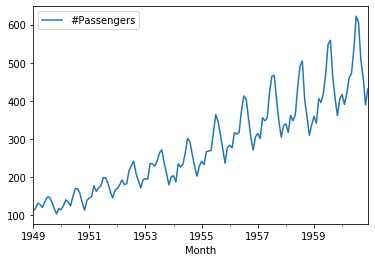

In [3]:
df.plot()

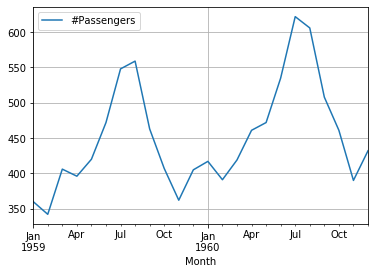

In [4]:
start_date=datetime(1959,1,1)
end_date=datetime(1961,12,1)
df[(start_date<=df.index) & (df.index<=end_date)].plot(grid=True)

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
dt,trnd=hpfilter(df['#Passengers'],lamb=1600)

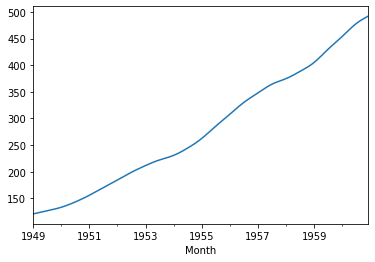

In [7]:
trnd.plot()

# ETS

In [8]:
#Error Trend Seasonality----- ETS DECOMPOSE

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
result=seasonal_decompose(df['#Passengers'],model='Multiplicative')

In [11]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: #Passengers, Length: 144, dtype: float64

In [12]:
result.seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: #Passengers, Length: 144, dtype: float64

In [13]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: #Passengers, Length: 144, dtype: float64

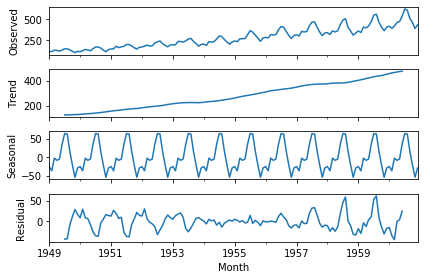

In [14]:
result.plot();

In [15]:
result1=seasonal_decompose(df['#Passengers'],model='Addictive')

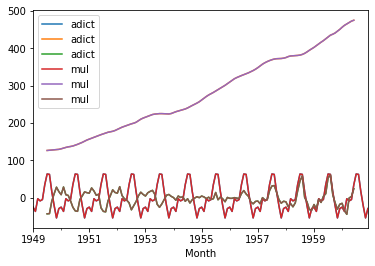

In [16]:
result1.seasonal.plot(legend=True,label="adict")
result1.trend.plot(legend=True,label="adict")
result1.resid.plot(legend=True,label="adict")
result.seasonal.plot(legend=True,label="mul")
result.trend.plot(legend=True,label="mul")
result.resid.plot(legend=True,label="mul")

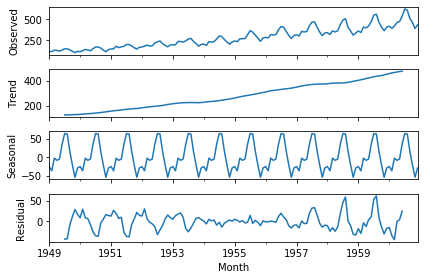

In [17]:
result.plot();

# EWMA

In [18]:
#SMA

In [19]:
df['SMA_6']=df["#Passengers"].rolling(window=6).mean()

In [20]:
df['SMA_12']=df["#Passengers"].rolling(window=12).mean()

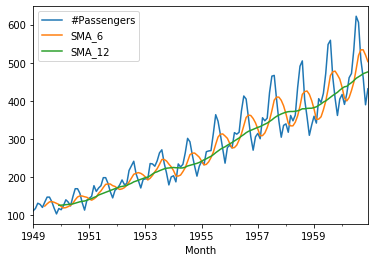

In [21]:
df.plot()

In [22]:
#EWMA

In [23]:
df['EWMA_12']=df['#Passengers'].ewm(span=12).mean()

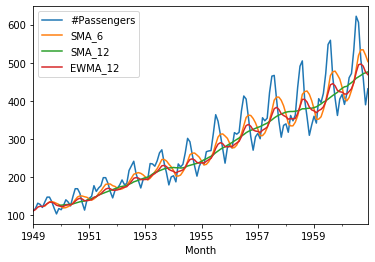

In [24]:
df.plot()

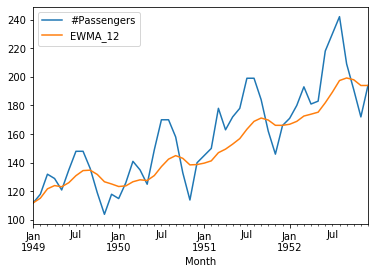

In [25]:
df[['#Passengers','EWMA_12']][:48].plot()

In [26]:
#HOLT WINTERS

In [27]:
#Simple Exponential Smoothing

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [29]:
span=12
alpha=2/(span+1)

In [30]:
model=SimpleExpSmoothing(df["#Passengers"])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [31]:
efm=model.fit(smoothing_level=alpha,optimized=False)

In [32]:
df['SEWMA_12']=efm.fittedvalues.shift(-1)

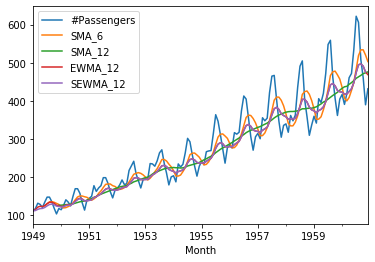

In [33]:
df.plot()

In [34]:
#Double Exponential Smoothing

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
df['DES_12']=ExponentialSmoothing(df['#Passengers'],trend='mul').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


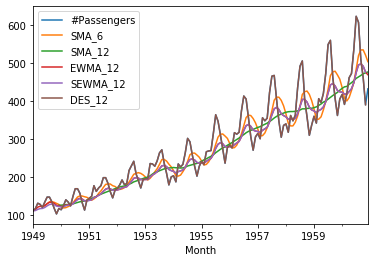

In [37]:
df.plot()

In [38]:
df.columns

Index(['#Passengers', 'SMA_6', 'SMA_12', 'EWMA_12', 'SEWMA_12', 'DES_12'], dtype='object')

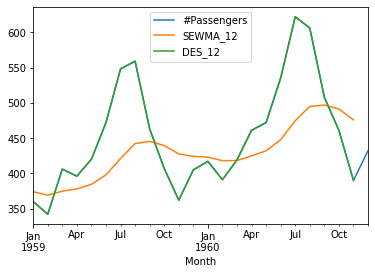

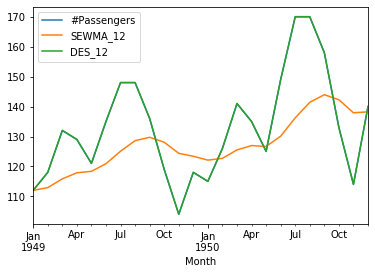

In [39]:
df[['#Passengers', 'SEWMA_12', 'DES_12']].iloc[-24:].plot()
df[['#Passengers', 'SEWMA_12', 'DES_12']].iloc[:24].plot()

In [40]:
##Add--trend

In [41]:
df['DES_12']=ExponentialSmoothing(df['#Passengers'],trend='add').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


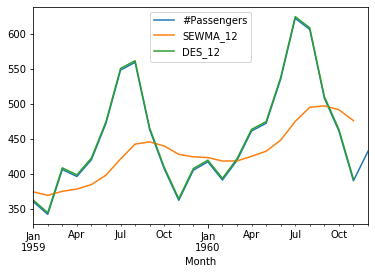

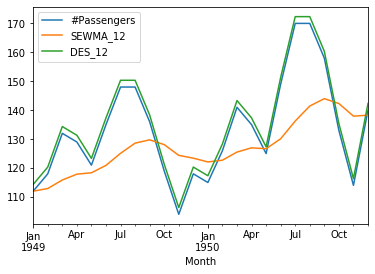

In [42]:
df[['#Passengers', 'SEWMA_12', 'DES_12']].iloc[-24:].plot()
df[['#Passengers', 'SEWMA_12', 'DES_12']].iloc[:24].plot()

In [43]:
#Triple Exponential

In [44]:
df['TES_12']=ExponentialSmoothing(df['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


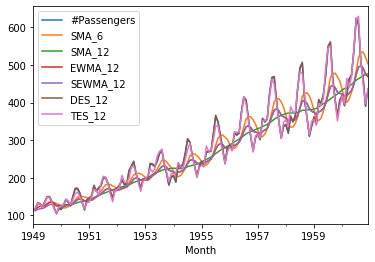

In [45]:
df.plot()

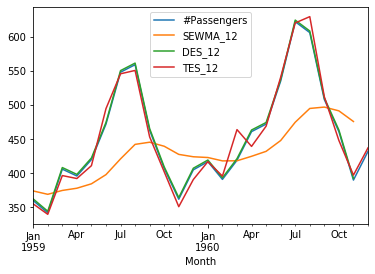

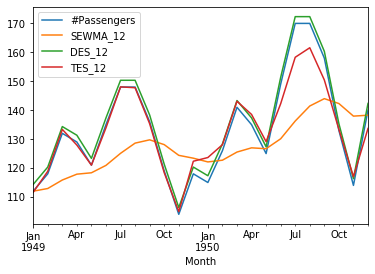

In [46]:
df[['#Passengers', 'SEWMA_12', 'DES_12','TES_12']].iloc[-24:].plot()
df[['#Passengers', 'SEWMA_12', 'DES_12','TES_12']].iloc[:24].plot()

In [47]:
#Forecasting :- Procedure

In [71]:
df.index.freq='MS'

In [72]:
train=df[['#Passengers']].iloc[:109]

In [73]:
test=df[['#Passengers']].iloc[108:]

In [50]:
test.head()

,#Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


In [74]:
tra_m=ExponentialSmoothing(train['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [52]:
pred_value=tra_m.forecast(36)

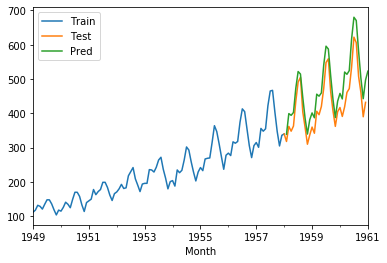

In [53]:
train['#Passengers'].plot(legend=True,label='Train')
test['#Passengers'].plot(legend=True,label='Test')
pred_value.plot(legend=True,label='Pred')



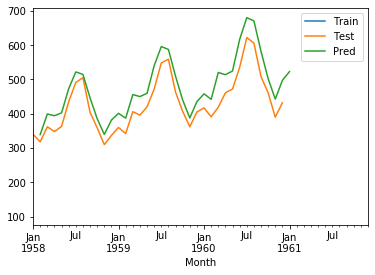

In [54]:
train['#Passengers'].plot(legend=True,label='Train')
test['#Passengers'].plot(legend=True,label='Test')
pred_value.plot(legend=True,label='Pred',xlim=['1958-01-01','1961-12-01'])

In [55]:
##Trying with another model

In [75]:
tr_m=ExponentialSmoothing(train['#Passengers'],trend='mul').fit()

In [57]:
tr_pred=tr_m.forecast(36)

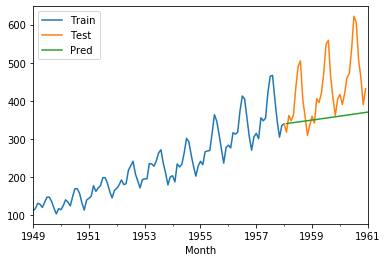

In [58]:
train['#Passengers'].plot(legend=True,label='Train')
test['#Passengers'].plot(legend=True,label='Test')
tr_pred.plot(legend=True,label='Pred')

In [59]:
#Evaluate

In [60]:
#________MAE,MSE,RMSE

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
test.describe()

,#Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [65]:
mean_absolute_error(test,tr_pred)

77.66983407940906

In [66]:
mean_squared_error(test,tr_pred)

10777.63605063643

In [67]:
import numpy as np

In [68]:
np.sqrt(mean_squared_error(test,tr_pred))

103.81539409276657

In [69]:
#Forercast Final Model

In [79]:
fin_mod=ExponentialSmoothing(df['#Passengers'],trend="mul",seasonal="mul",seasonal_periods=12).fit()

In [80]:
fore_pred=fin_mod.forecast(36)

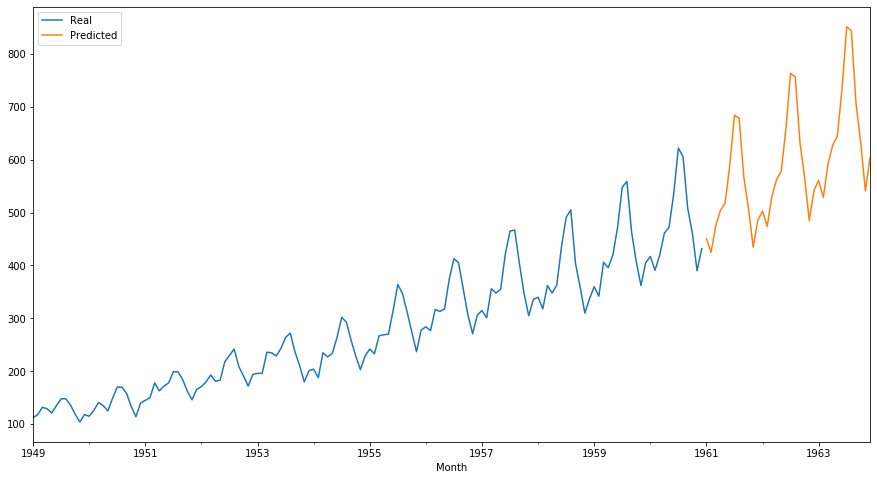

In [83]:

df['#Passengers'].plot(figsize=(15,8),legend=True,label="Real")
fore_pred.plot(figsize=(15,8),legend=True,label="Predicted")